In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\crfra\anaconda\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
from pandas.util.testing import assert_frame_equal

In [3]:
assets = ['T', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2017-1-1')['Adj Close']
pf_data.tail()

,T,^GSPC
Date,,
2020-05-27,31.850000,3036.129883
2020-05-28,31.059999,3029.729980
2020-05-29,30.860001,3044.310059
2020-06-01,30.930000,3055.729980
2020-06-02,30.990000,3080.820068


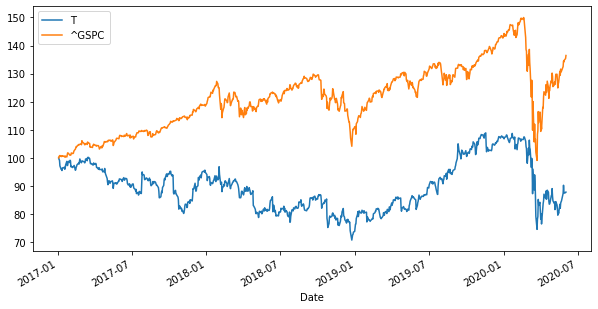

In [4]:
(pf_data/pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [5]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [6]:
# average
log_returns.mean() * 250

T       -0.037859
^GSPC    0.090557
dtype: float64

In [7]:
# covariance
log_returns.cov() * 250

,T,^GSPC
T,0.063651,0.034546
^GSPC,0.034546,0.043207


In [8]:
# correlation matrices
log_returns.corr()

,T,^GSPC
T,1.000000,0.658737
^GSPC,0.658737,1.000000


In [9]:
num_assets = len(assets)

In [10]:
#verify the number of assets
num_assets

2

In [11]:
arr = np.random.random(2)
arr

array([0.05494657, 0.63890766])

In [12]:
arr[0] + arr [1]

0.6938542374438031

In [13]:
# Obtain two randomly generated weights whose sum will always equal one
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.87277079, 0.12722921])

In [14]:
weights[0] + weights[1]

1.0

In [15]:
np.sum(weights * log_returns.mean()) * 250

-0.02152040082004584

In [16]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.2384455305413397

In [17]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.2384455305413397

In [18]:
# Create two lists of randomly generated expected returns:
pfolio_returns = []
pfolio_volatilities = []

# Create a loop that is set to randomly generate two weights: We are considering 1,000 different combinations of the same assets here!
# The idea is to compare the two and decide which one is more efficient:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities

([0.004848293263829865,
  0.02826682741497802,
  0.0012979358216797187,
  0.02110389858971161,
  0.06346844038190054,
  0.06877901286477121,
  0.02870953791392562,
  0.031839489867433256,
  0.029675204031965108,
  0.056805803628803636,
  -0.020343807744452866,
  -0.014162702638165964,
  0.02556650566557416,
  0.03819197860568156,
  0.06189091192285391,
  0.01929208770902366,
  -0.0063241131626055195,
  0.047444552599254064,
  0.0167509741936286,
  -0.03671465906875642,
  0.024823984569066548,
  -0.011239373480549318,
  0.0626470904581947,
  0.03559693198395091,
  0.03907419657534215,
  0.06341755680376081,
  0.012770606427110424,
  0.03810313236224059,
  0.07224016077163649,
  0.006987010001169078,
  0.08322333668901785,
  0.012438783728106662,
  0.06543692342853721,
  0.008814146684135332,
  0.06420972870955563,
  0.008565663791427753,
  0.025108228029702088,
  0.01735203185611761,
  0.013212066965720666,
  0.06848387771593284,
  0.010575237685716495,
  0.008318573896899354,
  0.03971

In [19]:
# Convert these lists into NumPy Arrays, revealing an alternative method to display the data
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 4.84829326e-03,  2.82668274e-02,  1.29793582e-03,  2.11038986e-02,
         6.34684404e-02,  6.87790129e-02,  2.87095379e-02,  3.18394899e-02,
         2.96752040e-02,  5.68058036e-02, -2.03438077e-02, -1.41627026e-02,
         2.55665057e-02,  3.81919786e-02,  6.18909119e-02,  1.92920877e-02,
        -6.32411316e-03,  4.74445526e-02,  1.67509742e-02, -3.67146591e-02,
         2.48239846e-02, -1.12393735e-02,  6.26470905e-02,  3.55969320e-02,
         3.90741966e-02,  6.34175568e-02,  1.27706064e-02,  3.81031324e-02,
         7.22401608e-02,  6.98701000e-03,  8.32233367e-02,  1.24387837e-02,
         6.54369234e-02,  8.81414668e-03,  6.42097287e-02,  8.56566379e-03,
         2.51082280e-02,  1.73520319e-02,  1.32120670e-02,  6.84838777e-02,
         1.05752377e-02,  8.31857390e-03,  3.97187082e-02,  2.19405674e-02,
         8.32652290e-03,  7.57074582e-02,  4.10320868e-02,  7.58775891e-02,
         2.27016435e-02,  4.08819171e-02,  7.68496001e-02,  4.09429620e-02,
         3.7

In [22]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [23]:
portfolios.head()

,Return,Volatility
0,0.004848,0.220157
1,0.028267,0.209023
2,0.001298,0.222290
3,0.021104,0.211862
4,0.063468,0.203061


In [24]:
portfolios.tail()

,Return,Volatility
995,0.048833,0.203877
996,0.017134,0.213656
997,-0.020565,0.237690
998,0.073288,0.203864
999,-0.011124,0.230584
